In [139]:
#do necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

# Exercises

### In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. 

### * Create a pandas dataframe, df_iris, from this data.

In [3]:
data('iris', show_doc=True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [4]:
df_iris = data('iris')

### * print the first 3 rows

In [5]:
print(df_iris.head(3))

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa


### * print the number of rows and columns (shape)

In [6]:
print(df_iris.shape)

(150, 5)


### * print the column names

In [7]:
print(df_iris.columns)

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')


### * print the data type of each column

In [8]:
print(df_iris.dtypes)

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object


### * print the summary statistics for each of the numeric variables

In [9]:
print(df_iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].describe())

       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [10]:
print(df_iris.describe())

       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## Read the data from this google sheet into a dataframe, df_google.

In [11]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

### * print the first 3 rows

In [12]:
print(df_google.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


### * print the number of rows and columns

In [13]:
print(df_google.shape)

(891, 12)


### * print the column names

In [14]:
print(df_google.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### * print the data type of each column

In [15]:
print(df_google.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### * print the summary statistics for each of the numeric variables

In [16]:
print(df_google.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### * print the unique values for each of your categorical variables

In [17]:
print(f'df_google.Pclass --> {df_google.Pclass.unique()}')

df_google.Pclass --> [3 1 2]


In [18]:
print(f'df_google.Sex --> {df_google.Sex.unique()}')

df_google.Sex --> ['male' 'female']


In [19]:
print(f'df_google.Cabin --> {df_google.Cabin.unique()}')

df_google.Cabin --> [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [20]:
print(f'df_google.Embarked --> {df_google.Embarked.unique()}')

df_google.Embarked --> ['S' 'C' 'Q' nan]


## Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

In [21]:
df_excel = pd.read_excel('train.xlsx')

In [22]:
df_excel.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803.0,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450.0,8.0500,NaN,S


### * assign the first 100 rows to a new dataframe, df_excel_sample

In [23]:
df_excel_sample = df_excel.head(100)

### * print the number of rows of your original dataframe

In [24]:
df_excel.shape

(891, 12)

### * print the first 5 column names

In [25]:
print(df_excel.columns.values[0:5])

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex']


### * print the column names that have a data type of object

In [26]:
print(df_excel.select_dtypes(include='object').columns.values)

['Name' 'Sex' 'Ticket' 'Cabin' 'Embarked']


### * compute the range for each of the numeric variables.

In [27]:
df_excel.select_dtypes(include='number').max() - df_excel.select_dtypes(include='number').min()

PassengerId    890.0000
Survived         1.0000
Pclass           2.0000
Age             79.5800
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64

# Exercises: Data Preparation

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

## Using the Iris Data:
### * Use the function defined in acquire.py to load the iris data.

In [28]:
df_iris = acquire.get_iris_data()

In [29]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


### * Drop the species_id and measurement_id columns.

In [30]:
df_iris.drop(['species_id', 'measurement_id'], axis=1, inplace=True)

### * Rename the species_name column to just species.

In [31]:
df_iris.rename({'species_name':'species'}, axis='columns', inplace=True)

### * Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [32]:
dummy_df = pd.get_dummies(df_iris[['species']], dummy_na=False, drop_first=True)

In [33]:
df_iris = pd.concat([df_iris, dummy_df], axis=1)

### * Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [34]:
def prep_iris(df_iris):
    """
    """
    df_iris.drop(['species_id', 'measurement_id'], axis=1, inplace=True)
    
    df_iris.rename({'species_name':'species'}, axis='columns', inplace=True)
    
    dummy_df = pd.get_dummies(df_iris[['species']], dummy_na=False, drop_first=True)
    
    df_iris = pd.concat([df_iris, dummy_df], axis=1)
    
    return df_iris

In [35]:
df = acquire.get_iris_data()

In [36]:
df = prep_iris(df)

In [37]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


## Using the Titanic dataset

### *Use the function defined in acquire.py to load the Titanic data.

### from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [38]:
df_titanic = acquire.get_titanic_data()

In [39]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    891 non-null    int64  
 1   passenger_id  891 non-null    int64  
 2   survived      891 non-null    int64  
 3   pclass        891 non-null    int64  
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sibsp         891 non-null    int64  
 7   parch         891 non-null    int64  
 8   fare          891 non-null    float64
 9   embarked      889 non-null    object 
 10  class         891 non-null    object 
 11  deck          203 non-null    object 
 12  embark_town   889 non-null    object 
 13  alone         891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [40]:
df_titanic.describe()

,Unnamed: 0,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [41]:
df_titanic.select_dtypes(include='number')

,Unnamed: 0,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
0,0,0,0,3,22.0,1,0,7.2500,0
1,1,1,1,1,38.0,1,0,71.2833,0
2,2,2,1,3,26.0,0,0,7.9250,1
3,3,3,1,1,35.0,1,0,53.1000,0
4,4,4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,27.0,0,0,13.0000,1
887,887,887,1,1,19.0,0,0,30.0000,1
888,888,888,0,3,NaN,1,2,23.4500,0
889,889,889,1,1,26.0,0,0,30.0000,1


### *Drop any unnecessary, unhelpful, or duplicated columns.

In [42]:
df_titanic.head(5)
#class == pclass --> keep pclass because already numerical
#Unnamed: 0 == unncessary --> drop
#deck too many missing --> drop
#age: too many missing --> drop

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [43]:
df_titanic.drop(['Unnamed: 0', 'embarked', 'class', 'age', 'deck'], axis=1, inplace=True)

In [44]:
# use imputer to fill nan values in embark_town column

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputer =  imputer.fit(df_titanic[['embark_town']])

df_titanic[['embark_town']] = imputer.transform(df_titanic[['embark_town']])

df_titanic.isnull().sum()

passenger_id    0
survived        0
pclass          0
sex             0
sibsp           0
parch           0
fare            0
embark_town     0
alone           0
dtype: int64

### *Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [45]:
df_titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1


In [46]:
dummy_titanic = pd.get_dummies(df_titanic[['sex', 'embark_town']], dummy_na=False, drop_first=['True', 'True'])

In [47]:
df_titanic = pd.concat([df_titanic, dummy_titanic], axis=1)

### *Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [48]:
def prep_titanic(df_titanic):
    """
    """
    df_titanic.drop(['Unnamed: 0', 'embarked', 'class', 'age', 'deck'], axis=1, inplace=True)
    
    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imputer =  imputer.fit(df_titanic[['embark_town']])
    df_titanic[['embark_town']] = imputer.transform(df_titanic[['embark_town']])

    dummy_titanic = pd.get_dummies(df_titanic[['sex', 'embark_town']], dummy_na=False, drop_first=['True', 'True'])
    df_titanic = pd.concat([df_titanic, dummy_titanic], axis=1)
    
    return df_titanic

In [49]:
df_test = acquire.get_titanic_data()

In [50]:
df_test = prep_titanic(df_test)

In [51]:
df_test

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


## Using the Telco dataset

### Use the function defined in `acquire.py` to load the Telco data.

In [52]:
df_telco = acquire.get_telco_data()

In [53]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

### Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [54]:
# with duplicates dropped, identify others that can be dropped. try using crosstabs
pd.crosstab(df_telco.internet_service_type_id, df_telco.internet_service_type) # --> can safely drop internet_service_type_id
pd.crosstab(df_telco.payment_type_id, df_telco.payment_type) # --> can safely drop payment_type_id
pd.crosstab(df_telco.contract_type_id, df_telco.contract_type) # --> can safely drop contract_type_id

contract_type,Month-to-month,One year,Two year
contract_type_id,,,
1,3875,0,0
2,0,1473,0
3,0,0,1695


In [55]:
df_telco = df_telco.drop(columns=['internet_service_type_id', 'payment_type_id', 'contract_type_id'])

In [56]:
df_telco.head(5)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


In [57]:
# for loop to help run through columns and get handle on what values each contains
for col in df_telco.columns:
    if col not in ['tenure', 'customer_id', 'monthly_charges', 'total_charges']:
        print(df_telco[col].value_counts())
        print()

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: senior_citizen, dtype: int64

No     3641
Yes    3402
Name: partner, dtype: int64

No     4933
Yes    2110
Name: dependents, dtype: int64

Yes    6361
No      682
Name: phone_service, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64

No                     2810
Yes                    2707
No internet service    1526
Name: streaming_tv, dtype: int64

No      

### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [58]:
# important to understand encoding guards against inadvertantly treating nominal categorical data as ordinal
# categorical columns with yes/no (either/or) values are binary. so they don't need dummy creation. just binary (1/0) encoding
# binary columns --> churn, gender, senior citizen, partner, dependants, phone_service, paperless_billing
    # can use mapping or column creation 

In [59]:
gender_map = df_telco.gender.map({'Female':1, 'Male':0})

In [60]:
gender_map # --> good test

0       1
1       0
2       0
3       0
4       1
       ..
7038    1
7039    0
7040    0
7041    0
7042    0
Name: gender, Length: 7043, dtype: int64

In [61]:
df_telco['gender_encoded'] = df_telco.gender.map({'Female':1, 'Male':0})
df_telco['partner_encoded'] = df_telco.partner.map({'Yes':1, 'No':0})
df_telco['dependents_encoded'] = df_telco.dependents.map({'Yes':1, 'No':0})
df_telco['phone_service_encoded'] = df_telco.phone_service.map({'Yes':1, 'No':0})
df_telco['paperless_billing_encoded'] = df_telco.paperless_billing.map({'Yes':1, 'No':0})
df_telco['churn_encoded'] = df_telco.churn.map({'Yes':1, 'No':0})

In [62]:
# categorical columns --> contract_type, payment_type, internet_service_type, multiple_lines, online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies, paperless_billing

In [63]:
dummy_telco = pd.get_dummies(df_telco[['contract_type', 'payment_type', 'internet_service_type', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']], dummy_na=False, drop_first=True)

In [64]:
dummy_telco.head()

,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [65]:
df_telco = pd.concat([df_telco, dummy_telco], axis=1)

In [66]:
df_telco.total_charges = pd.to_numeric(df_telco.total_charges.str.strip())

### Create a function named `prep_telco` that accepts the raw telco data, and returns the data with the transformations above applied.

In [67]:
def prep_telco(df_telco):
    """
    """
    df_telco = df_telco.drop(columns=['internet_service_type_id', 'payment_type_id', 'contract_type_id'])
    
    df_telco['gender_encoded'] = df_telco.gender.map({'Female':1, 'Male':0})
    df_telco['partner_encoded'] = df_telco.partner.map({'Yes':1, 'No':0})
    df_telco['dependents_encoded'] = df_telco.dependents.map({'Yes':1, 'No':0})
    df_telco['phone_service_encoded'] = df_telco.phone_service.map({'Yes':1, 'No':0})
    df_telco['paperless_billing_encoded'] = df_telco.paperless_billing.map({'Yes':1, 'No':0})
    df_telco['churn_encoded'] = df_telco.churn.map({'Yes':1, 'No':0})
    
    dummy_telco = pd.get_dummies(df_telco[['contract_type',\
                                           'payment_type', \
                                           'internet_service_type', \
                                           'multiple_lines', \
                                           'online_security',\
                                           'online_backup',\
                                           'device_protection',\
                                           'tech_support',\
                                           'streaming_tv',\
                                           'streaming_movies']], dummy_na=False, drop_first=True)
    
    df_telco = pd.concat([df_telco, dummy_telco], axis=1)
    df_telco.total_charges = pd.to_numeric(df_telco.total_charges.str.strip())
    
    return df_telco

### Split your data

* Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [68]:
def split_data(df, target):
    """
    """
    
    train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train[target])
    
    return train, validate, test

* Run the function in your notebook on the Iris dataset, returning 3 datasets: `train_iris`, `validate_iris` and `test_iris`.

In [69]:
df_iris = acquire.get_iris_data()

In [70]:
df_iris = prepare.prep_iris(df_iris)

In [71]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [72]:
target = 'species'

In [73]:
train_iris, validate_iris, test_iris = split_data(df_iris, target)

In [74]:
#verify shapes of prepared df, train, validate, and test subsets
print(f'Prepared df: {df_iris.shape}')
print()
print(f'Train: {train_iris.shape}')
print(f'Validate: {validate_iris.shape}')
print(f'Test: {test_iris.shape}')

Prepared df: (150, 7)

Train: (90, 7)
Validate: (30, 7)
Test: (30, 7)


* Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic. 
* print out shapes of each + the prepped df

In [75]:
df_titanic = acquire.get_titanic_data()
df_titanic.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [76]:
df_titanic = prepare.prep_titanic(df_titanic)

In [77]:
df_titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [78]:
train_titanic, validate_titanic, test_titanic = split_data(df_titanic, 'survived')

In [79]:
#verify shapes of prepared df, train, validate, and test subsets
print(f'Prepared df: {df_titanic.shape}')
print()
print(f'Train: {train_titanic.shape}')
print(f'Validate: {validate_titanic.shape}')
print(f'Test: {validate_titanic.shape}')

Prepared df: (891, 12)

Train: (534, 12)
Validate: (178, 12)
Test: (178, 12)


Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [80]:
df_telco = acquire.get_telco_data()

In [81]:
df_telco = prepare.prep_telco(df_telco)

In [82]:
df_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,0,0,1,0,1,0,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,0,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,1,0,0,0,0,0,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,0,1,0,1,0,0,0,1,0,1
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,0,0,0,0,0,1,0,1,0,0


In [83]:
train_telco, validate_telco, test_telco = split_data(df_telco, 'churn')

In [84]:
#verify shapes of prepared df, train, validate, and test subsets
print(f'Prepared df: {df_telco.shape}')
print()
print(f'Train: {train_telco.shape}')
print(f'Validate: {validate_telco.shape}')
print(f'Test: {test_telco.shape}')

Prepared df: (7043, 48)

Train: (4225, 48)
Validate: (1409, 48)
Test: (1409, 48)


# ------------------------ #

# Exercises: Exploratory Analysis
## Part 1: `iris_db`

Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

### Section 1: Acquire, prepare & split your data.
Using iris data from our mySQL server and the methods used in the lesson above:

In [85]:
df_iris = acquire.get_iris_data()

In [86]:
df_iris = prepare.prep_iris(df_iris)

In [87]:
train_iris, validate_iris, test_iris = prepare.split_data(df_iris, 'species')

Prepared df: (150, 7)

Train: (90, 7)
Validate: (30, 7)
Test: (30, 7)


In [88]:
#verify shapes of prepared df, train, validate, and test subsets
print(f'Prepared df: {df_iris.shape}')
print()
print(f'Train: {train_iris.shape}')
print(f'Validate: {validate_iris.shape}')
print(f'Test: {test_iris.shape}')

Prepared df: (150, 7)

Train: (90, 7)
Validate: (30, 7)
Test: (30, 7)


In [89]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [90]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        150 non-null    float64
 1   sepal_width         150 non-null    float64
 2   petal_length        150 non-null    float64
 3   petal_width         150 non-null    float64
 4   species             150 non-null    object 
 5   species_versicolor  150 non-null    uint8  
 6   species_virginica   150 non-null    uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 6.3+ KB


### Section 2: Univariate Stats

* For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [91]:
train_iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
count,90.000000,90.000000,90.000000,90.000000,90,90.000000,90.000000
unique,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,versicolor,NaN,NaN
freq,NaN,NaN,NaN,NaN,30,NaN,NaN
mean,5.875556,3.070000,3.782222,1.203333,NaN,0.333333,0.333333
std,0.792282,0.436135,1.742114,0.755422,NaN,0.474045,0.474045
min,4.400000,2.200000,1.200000,0.100000,NaN,0.000000,0.000000
25%,5.225000,2.800000,1.600000,0.400000,NaN,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,NaN,0.000000,0.000000
75%,6.400000,3.375000,5.100000,1.800000,NaN,1.000000,1.000000


In [92]:
#use dytpes to select numeric columns
num_columns = train_iris.select_dtypes(include='float64').columns

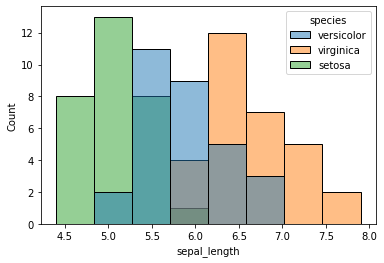

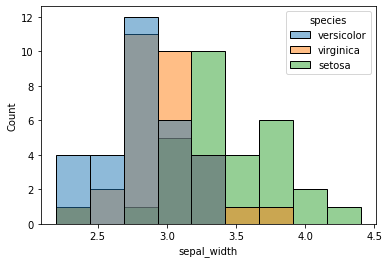

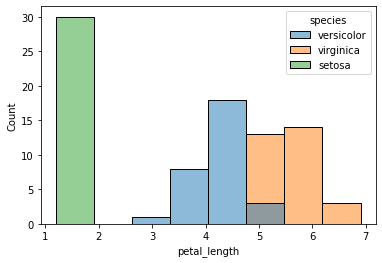

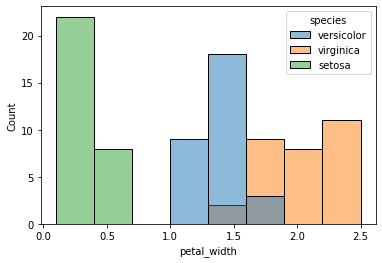

In [93]:
for col in num_columns:
    sns.histplot(data=train_iris, x=col, hue='species')
    plt.show()

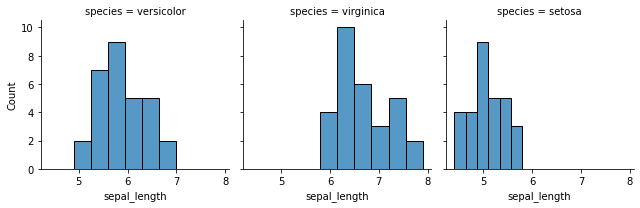

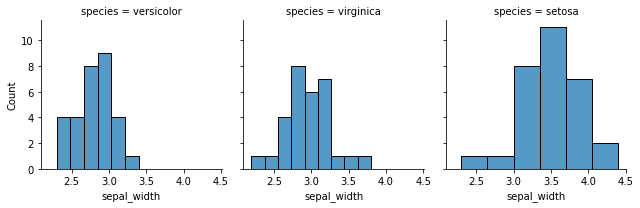

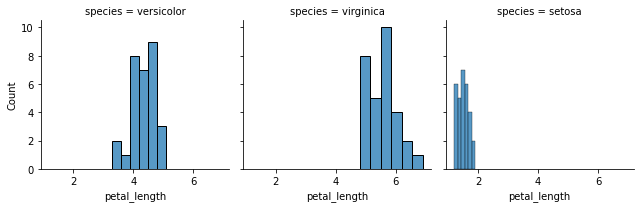

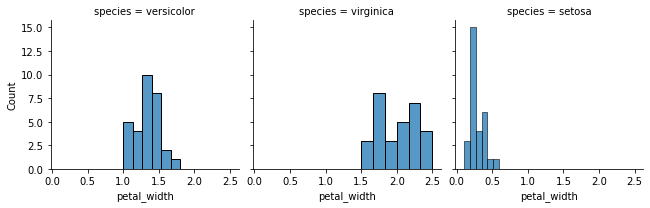

In [141]:
for col in num_columns:
    vis_iris = sns.FacetGrid(data=train_iris, col='species')
    vis_iris.map_dataframe(sns.histplot, x=col)

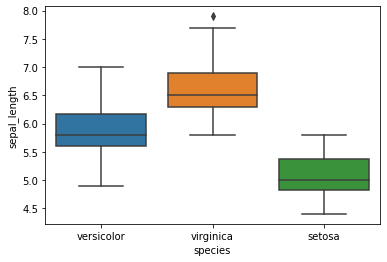

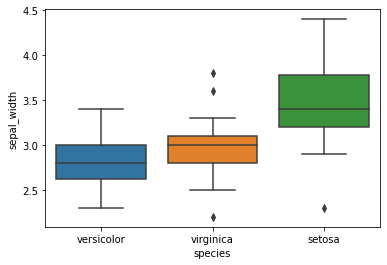

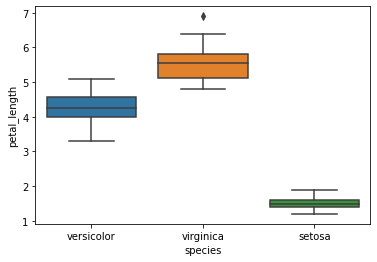

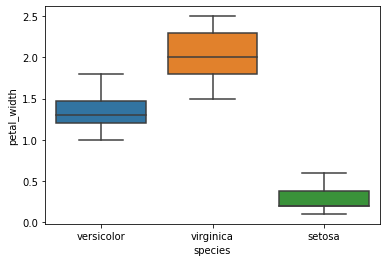

In [100]:
for col in num_columns:
    sns.boxplot(data=train_iris, y=col, x='species')
    plt.show()

* For each species (categorical variable): create a frequency table and a bar plot of those frequencies. sepcies is the *target* variable.

In [104]:
cat_columns = train_iris.select_dtypes(exclude='float64').columns

species
versicolor    30
virginica     30
setosa        30
Name: species, dtype: int64
versicolor    33.333333
virginica     33.333333
setosa        33.333333
Name: species, dtype: float64


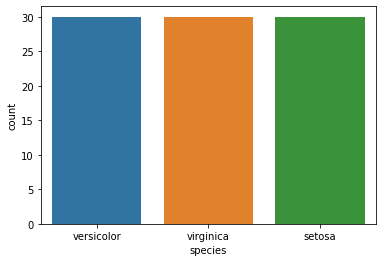

species_versicolor
0    60
1    30
Name: species_versicolor, dtype: int64
0    66.666667
1    33.333333
Name: species_versicolor, dtype: float64


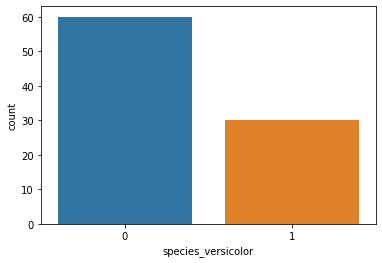

species_virginica
0    60
1    30
Name: species_virginica, dtype: int64
0    66.666667
1    33.333333
Name: species_virginica, dtype: float64


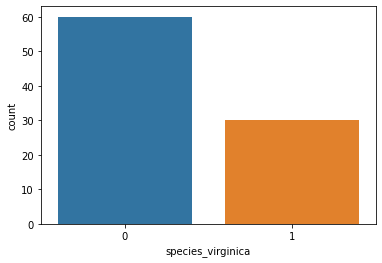

In [107]:
for col in cat_columns:
    print(col)
    print(train_iris[col].value_counts())
    print(train_iris[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train_iris)
    plt.show()

* Document takeaways & any actions.
    * Setosa appears to have the smallets petal area of the species, with virginica having the largest.
    * Virignica has the most outliers in sepal length/width

### Section 3: Bivariate Stats

* Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

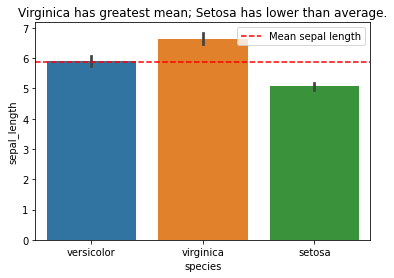

In [117]:
# add title based on takeaway
plt.title('Virginica has greatest mean; Setosa has lower than average.')
sns.barplot(data=train_iris, x='species', y='sepal_length')
plt.axhline(train_iris.sepal_length.mean(), label='Mean sepal length', color='red', linestyle='dashed')
plt.legend()
plt.show()

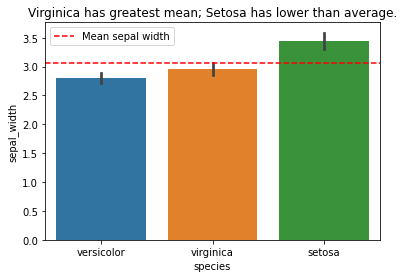

In [121]:
# add title based on takeaway
plt.title('Setosa has highest average sepal_width')
sns.barplot(data=train_iris, x='species', y='sepal_width')
plt.axhline(train_iris.sepal_width.mean(), label='Mean sepal width', color='red', linestyle='dashed')
plt.legend()
plt.show()

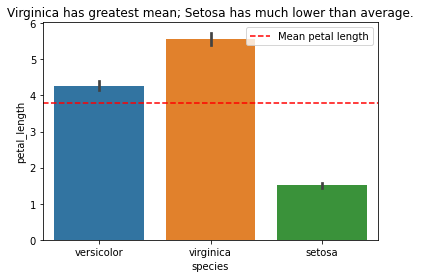

In [120]:
# add title based on takeaway
plt.title('Virginica has greatest mean; Setosa has much lower than average.')
sns.barplot(data=train_iris, x='species', y='petal_length')
plt.axhline(train_iris.petal_length.mean(), label='Mean petal length', color='red', linestyle='dashed')
plt.legend()
plt.show()

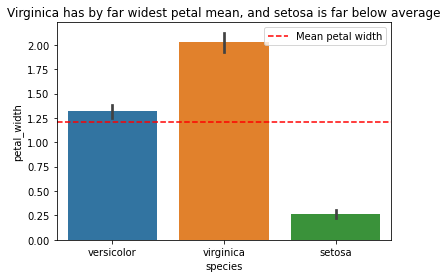

In [124]:
# add title based on takeaway
plt.title('Virginica has by far widest petal mean, and setosa is far below average')
sns.barplot(data=train_iris, x='species', y='petal_width')
plt.axhline(train_iris.petal_width.mean(), label='Mean petal width', color='red', linestyle='dashed')
plt.legend()
plt.show()

* For each measurement type, compute the descriptive statistics for each species.

In [130]:
train_iris.species.unique()

array(['versicolor', 'virginica', 'setosa'], dtype=object)

In [137]:
for species in train_iris.species.unique():
    print(species)
    print(train_iris[train_iris.species == species].describe(exclude='uint8'))
    print('\n-----')

versicolor
        sepal_length  sepal_width  petal_length  petal_width     species
count       30.00000    30.000000     30.000000    30.000000          30
unique           NaN          NaN           NaN          NaN           1
top              NaN          NaN           NaN          NaN  versicolor
freq             NaN          NaN           NaN          NaN          30
mean         5.91000     2.806667      4.273333     1.320000         NaN
std          0.47659     0.281539      0.409317     0.193694         NaN
min          4.90000     2.300000      3.300000     1.000000         NaN
25%          5.60000     2.625000      4.000000     1.200000         NaN
50%          5.80000     2.800000      4.250000     1.300000         NaN
75%          6.17500     3.000000      4.575000     1.475000         NaN
max          7.00000     3.400000      5.100000     1.800000         NaN

-----
virginica
        sepal_length  sepal_width  petal_length  petal_width    species
count      30.000000    

* For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

    * state significance level

In [138]:
alpha = .05

    * Craft null/alternative hypothesis

${H_0}$: There is no significant difference in mean petal width between the two groups.

${H_a}$: There is significant difference in mean petal width between the two groups.

    * Calculate test statistic

In [149]:
u, p = stats.mannwhitneyu(train_iris[train_iris.species == 'virginica'].petal_width, train_iris[train_iris.species == 'versicolor'].petal_width)

print(f'u-statistic: {u} , p-value: {p}\n')
if p < alpha:
      print('Significantly lower p-value, reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

u-statistic: 883.0 , p-value: 1.274471779403707e-10

Significantly lower p-value, reject null hypothesis


In [156]:
measurements = ['sepal_length', 'sepal_width', 'petal_length']

for measurement in measurements:
    u, p = stats.mannwhitneyu(train_iris[train_iris.species == 'virginica'][measurement], train_iris[train_iris.species == 'versicolor'][measurement])
    print(f'-----\nComparing {measurement} between virginica and versicolor')
    print(f'u-statistic: {u} , p-value: {p}')
    if p < alpha:
          print('Significantly lower p-value, reject null hypothesis')
    else:
        print('Fail to reject null hypothesis')

-----
Comparing sepal_length between virginica and versicolor
u-statistic: 767.0 , p-value: 2.7482419419191076e-06
Significantly lower p-value, reject null hypothesis
-----
Comparing sepal_width between virginica and versicolor
u-statistic: 575.0 , p-value: 0.06370930409956933
Fail to reject null hypothesis
-----
Comparing petal_length between virginica and versicolor
u-statistic: 892.5 , p-value: 6.02995793051305e-11
Significantly lower p-value, reject null hypothesis


* **Document takeaways & any actions**

    * There is significant different between the two species in petal attributes, and sepal length
    * The different species have more closely grouped sepal measurements, and divergent petal areas
    * Virginica appears to have the largest petals, and setosa smallest

### Section 4: Multivariate Stats

* Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [159]:
#create area column for later use
train_iris['petal_area'] = train_iris.petal_width * train_iris.petal_length
train_iris['sepal_area'] = train_iris.sepal_width * train_iris.sepal_length

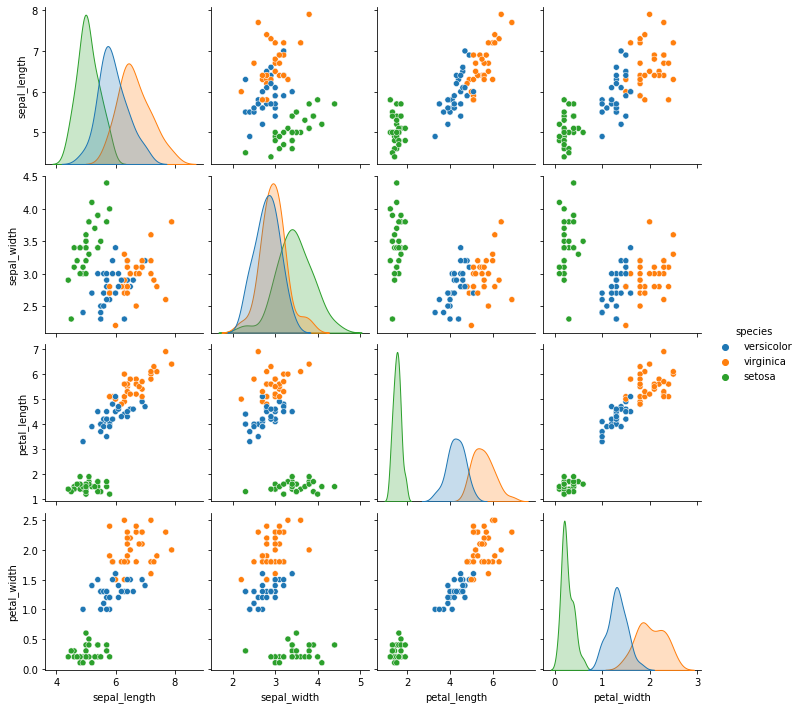

In [158]:
sns.pairplot(data=train_iris, hue='species', vars=num_columns)
#takeaways
# not much 

* Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

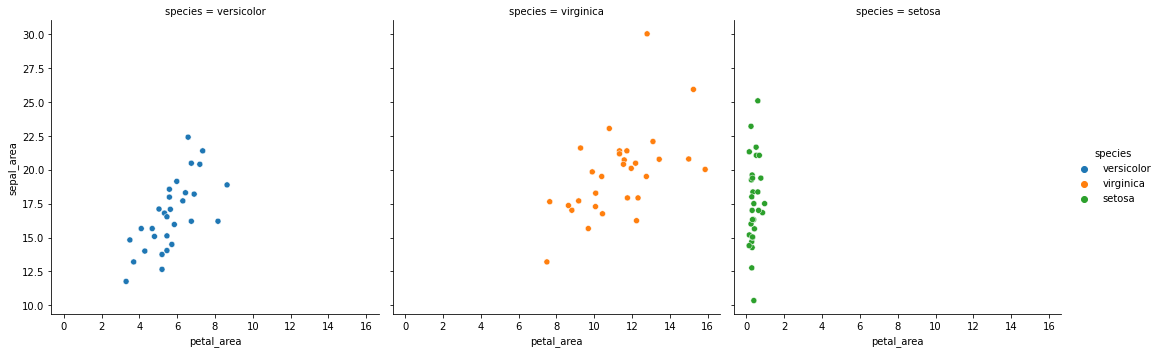

In [162]:
sns.relplot(data=train_iris, x='petal_area', y='sepal_area', hue='species', col='species')

* Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [168]:
melt_iris = train_iris.melt(id_vars=['species'], var_name='measurements')
melt_iris.head()

,species,measurements,value
0,versicolor,sepal_length,5.9
1,virginica,sepal_length,6.3
2,versicolor,sepal_length,6.3
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.7


<AxesSubplot:xlabel='measurements', ylabel='value'>

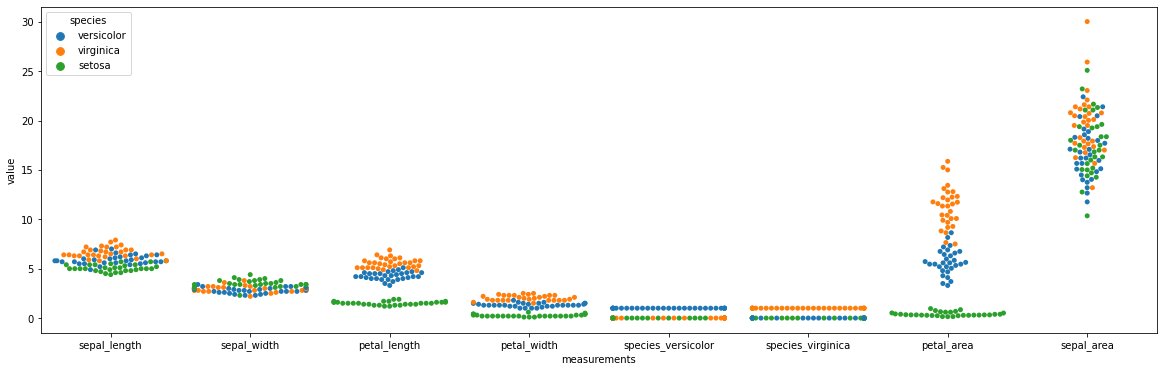

In [172]:
plt.figure(figsize=(20,6))
sns.swarmplot(data=melt_iris, x='measurements', y='value', hue='species')
#takeaways
# clear differences in petal area. 
# sepal area spread is similar between all species. This is primarily driven by sepal_width

* Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

<AxesSubplot:xlabel='species', ylabel='sepal_area'>

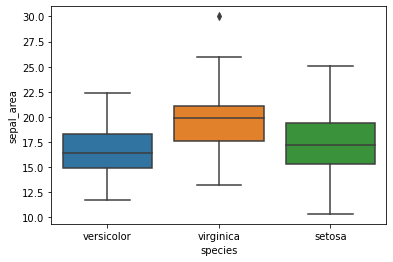

In [183]:
sns.boxplot(data=train_iris, y='sepal_area', x='species')

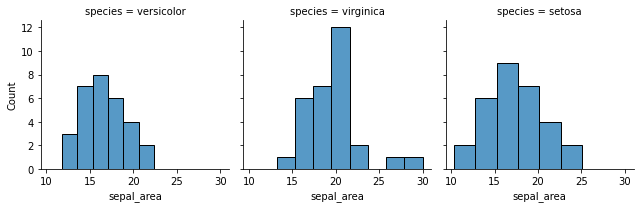

In [192]:
sns.FacetGrid(data=train_iris, col='species').map_dataframe(sns.histplot, 'sepal_area')

   `Correlation Test`
    
   * ${H_0}$ : Sepal area is roughly equal for virginica and setosa
   * ${H_a}$ : Sepal area differs significantly between virginica and setosa
   * alpha = .05
   
   * Assumptions: Appears normally distributed, independant, and of equal variance 

In [196]:
#variance check
virginica = train_iris[train_iris['species'] == 'virginica']
versicolor = train_iris[train_iris['species'] == 'versicolor']
print(f'virginica variance = {(virginica["sepal_area"].std()) ** .05}')
print(f'versicolor variance = {(versicolor["sepal_area"].std()) ** .05}')

In [207]:
#set up two-tailed t-test with alpha = .05
alpha = 0.05
t, p = stats.ttest_ind(virginica.sepal_length, versicolor.sepal_length, equal_var=True)
print(f't-statistic is: {t}')
print(f'p-value is: {p}')

if p < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject hypothesis')

t-statistic is: 5.640132524197554
p-value is: 5.299383511391135e-07
Reject null hypothesis


* Document takeaways and any actions.
    * clear differences in petal area. 
    * sepal area spread is similar between all species. This is primarily driven by sepal_width
    * setosa most easily identifiable species due to differences in each measurment

## Part II: `titanic`
Explore your titanic dataset more completely.

In [110]:
df_b = acquire.get_titanic_data()
df_b = prep_titanicx(df_b)
df_b

,passenger_id,survived,pclass,age,sibsp,parch,fare,embarked,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,0,3,22.0,1,0,7.2500,S,0,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,C,0,1,1,0,0
2,2,1,3,26.0,0,0,7.9250,S,1,1,0,0,1
3,3,1,1,35.0,1,0,53.1000,S,0,1,0,0,1
4,4,0,3,35.0,0,0,8.0500,S,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,885,0,3,39.0,0,5,29.1250,Q,0,1,0,1,0
886,886,0,2,27.0,0,0,13.0000,S,1,0,0,0,1
887,887,1,1,19.0,0,0,30.0000,S,1,1,0,0,1
889,889,1,1,26.0,0,0,30.0000,C,1,0,1,0,0


* Determine drivers of the target variable
* Determine if certain columns should be dropped
* Determine if it would be valuable to bin some numeric columns
* Determine if it would be valuable to combine multiple columns into one.
* Does it make sense to combine any features?
* Do you find any surprises?
* Document any and all findings and takeaways in your notebook using markdown.

## Part III: `telco`
Explore your telco data to discover drivers of churn

* Determine if certain columns should be dropped
* Determine if it would be valuable to bin some numeric columns
* Determine if it would be valuable to combine multiple columns into one.
* What are your drivers of churn?
* Does it make sense to combine any features?
* Do you find any surprises?
* Document any and all findings and takeaways in your notebook using markdown.

In [ ]:
: